In [15]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')

from sim.LoadBalancer import LoadBalancer
from sim.Source import ArrivalSchedule, Source
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancer
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the model

In [17]:
with open('../data/lin_reg_model.pkl', 'rb') as f:
    model = pickle.load(f)

### Test for fixed rate

In [17]:
from BinarySearch import binaryServerSearch

opt = binaryServerSearch(10,[0,40])
print(opt)

17


In [19]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [20]:
stopTime = 1*24*60*60
env = Environment(stopTime=stopTime)

eta = lambda t: sigmoid(2-0.05*t)
#eta = 0.4
#sigmoid(2/(0.1*t+2)-0.5)
loadBalancer = GreedyEpsilonLoadBalancer(nServers=10, environment=env, model = model, eta=eta, nServerRange=[10,30], usePartialFit=False)

requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalsPerSecond = 10
source = Source(arrivalsPerSecond, requestTypes, loadBalancer, env)

schedule = np.array([arrivalsPerSecond]) #12 periods
periodLength = 1*60*60 #half an hour per period -> schedule repeated two times in 12 hours
arrivalSchedule = ArrivalSchedule(periodLength,arrivalSchedule=schedule, environment=env, loadBalancer=loadBalancer, source=source)
env.run(debug=False)

35878 2140 10 14477.166666666666
14
35971 646 14 29509.833333333332
nan
(1, 8) (1, 1)
30


/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


36139 0.0 30 36136.5
1.0
(2, 8) (2, 1)
11
35865 1832 11 17544.083333333332
1.0
(3, 8) (3, 1)
21
36051 13 21 35919.25
1.0
(4, 8) (4, 1)
19
35992 0.0 19 35990.416666666664
1.0
(5, 8) (5, 1)
17
36233 4 17 36191.583333333336
1.0
(6, 8) (6, 1)
Max reward for [26529.68955854] 29
29
36119 0.0 29 36116.583333333336
1.0
(7, 8) (7, 1)
Max reward for [46962.79179601] 29
29
35929 0.0 29 35926.583333333336
1.0
(8, 8) (8, 1)
25
36081 0.0 25 36078.916666666664
0.9946802932431547
(9, 8) (9, 1)
19
36036 0.0 19 36034.416666666664
0.980347807852835
(10, 8) (10, 1)
17
35930 2 17 35908.583333333336
0.974935282551751
(11, 8) (11, 1)
Max reward for [31472.32416325] 10
10
35924 2054 10 15383.166666666666
0.7588504320242194
(12, 8) (12, 1)
27
35991 1 27 35978.75
0.7593375652862451
(13, 8) (13, 1)
15
35820 182 15 33998.75
0.6901937189451319
(14, 8) (14, 1)
19
36090 0.0 19 36088.416666666664
0.5915908447299739
(15, 8) (15, 1)
17
35827 0.0 17 35825.583333333336
0.5673268771917429
(16, 8) (16, 1)
13
35923 1095 13 

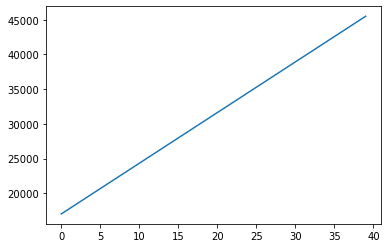

In [21]:
X = loadBalancer.X[-1,:]
X
pred = []
for n  in range(0,40):
    X_ = np.append(X[:-1], n)
    rewardHat = loadBalancer.model.predict(X_[None,:])[0]
    pred.append(rewardHat)

plt.plot(range(0,40), pred)

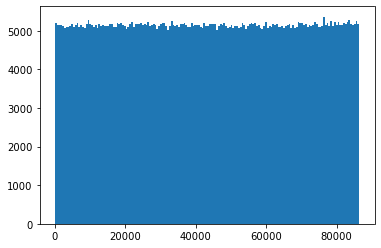

In [22]:
plt.hist(env.logTime['arrivalEvent'], bins=7*24);

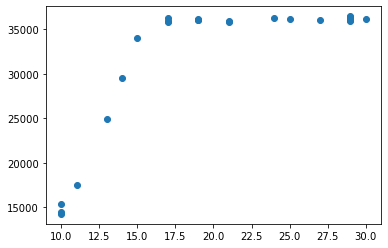

In [23]:
plt.scatter(env.log['numberOfServers'][::2], env.log['reward'])

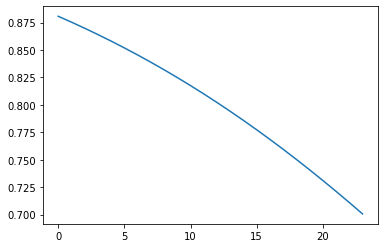

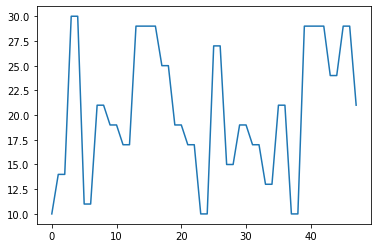

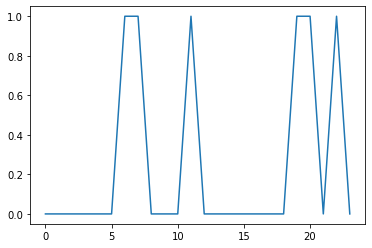

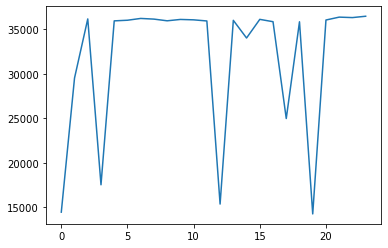

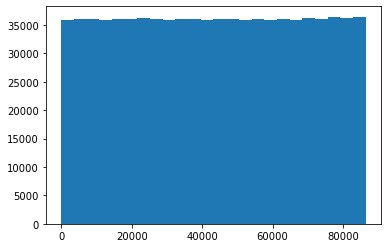

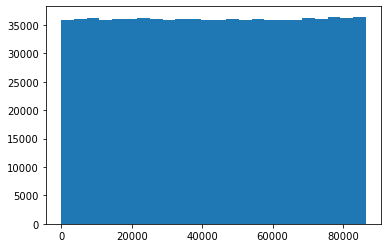

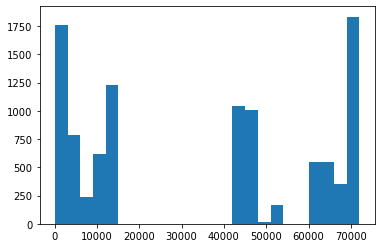

In [24]:
plt.plot(env.log['eta'])
plt.figure()
plt.plot(env.log['numberOfServers'])
plt.figure()
plt.plot(env.log['greedyEpsilonActionType'])
plt.figure()
plt.plot(env.log['reward'])
plt.figure()
plt.hist(env.logTime['arrivalEvent'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestProcessed'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestCancelled'], bins=int(stopTime/60/60));

Text(0, 0.5, 'y')

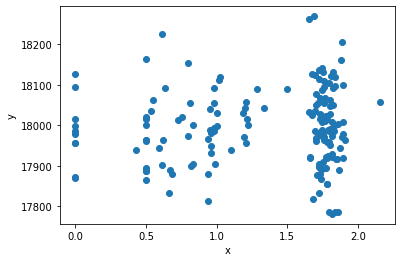

In [14]:
plt.scatter(loadBalancer.X[:-1,0],loadBalancer.y)
plt.xlabel('x')
plt.ylabel('y')

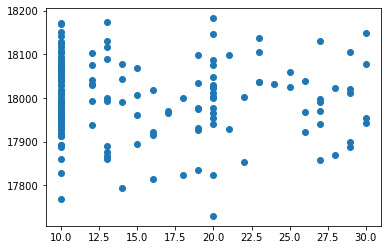

In [52]:
plt.scatter(env.log['numberOfServers'][0::2],env.log['reward'])

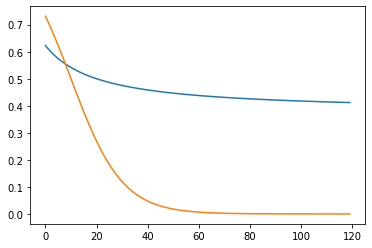

In [31]:

def sigmoid(x):
      return 1 / (1 + np.exp(-x))

x = np.arange(0,120,1)
plt.plot(x, sigmoid(2/(0.1*x+2)-0.5))
plt.plot(x, sigmoid(1-0.1*x))

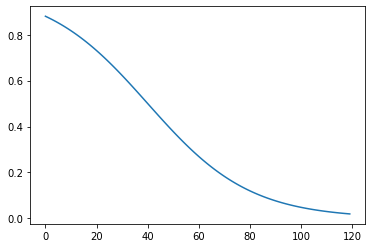

In [38]:
x = np.arange(0,120,1)
plt.plot(x, sigmoid(2-0.05*x))